In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file=pd.read_csv('Data.csv')

In [3]:
file.head()

,InvoiceDate,Invoice Time,CustomerID,InvoiceNo,StockCode,Description,Country,Quantity,UnitPrice,Revenue,Items availability
0,14.12.2017,6:00,AVpgMuGwLJeJML43KY_c,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,6,2.55,15.30,In Stock
1,08.09.2017,5:00,AVpgMuGwLJeJML43KY_c,536365,71053,WHITE METAL LANTERN,United Kingdom,6,3.39,20.34,In Stock
2,10.10.2017,5:00,AVpgMuGwLJeJML43KY_c,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom,8,2.75,22.00,In Stock
3,28.08.2017,7:00,AVpgMuGwLJeJML43KY_c,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,6,3.39,20.34,In Stock
4,24.10.2017,4:00,AVpgMuGwLJeJML43KY_c,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,6,3.39,20.34,In Stock


In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   InvoiceDate         19999 non-null  object 
 1   Invoice Time        19999 non-null  object 
 2   CustomerID          19999 non-null  object 
 3   InvoiceNo           19999 non-null  int64  
 4   StockCode           19999 non-null  object 
 5   Description         19999 non-null  object 
 6   Country             19999 non-null  object 
 7   Quantity            19999 non-null  int64  
 8   UnitPrice           19999 non-null  float64
 9   Revenue             19999 non-null  float64
 10  Items availability  19999 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.7+ MB


In [5]:
file.describe()

,InvoiceNo,Quantity,UnitPrice,Revenue
count,19999.000000,19999.000000,19999.000000,19999.000000
mean,545115.134307,10.801240,2.985579,20.080151
std,5492.606894,46.768777,4.137969,88.068819
min,536365.000000,1.000000,0.100000,0.120000
25%,540520.000000,1.000000,1.250000,3.300000
50%,544836.000000,4.000000,1.950000,8.950000
75%,549947.000000,10.000000,3.750000,17.400000
max,554656.000000,3906.000000,195.000000,3828.000000


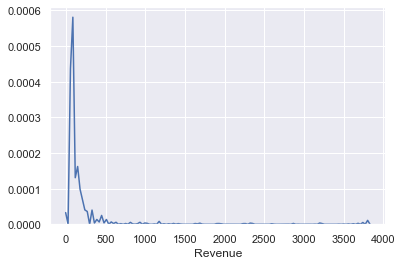

In [6]:
sns.set()
sns.distplot(file['Revenue'],hist=False)

In [7]:
pd.qcut(file['Revenue'],5)

0          (12.6, 19.8]
1        (19.8, 3828.0]
2        (19.8, 3828.0]
3        (19.8, 3828.0]
4        (19.8, 3828.0]
              ...      
19994      (12.6, 19.8]
19995      (12.6, 19.8]
19996      (5.95, 12.6]
19997      (12.6, 19.8]
19998    (19.8, 3828.0]
Name: Revenue, Length: 19999, dtype: category
Categories (5, interval[float64]): [(0.119, 2.58] < (2.58, 5.95] < (5.95, 12.6] < (12.6, 19.8] < (19.8, 3828.0]]

In [8]:
file['revenue_buckets']=pd.qcut(file['Revenue'],5,labels=['Very Low','Low','Good','Very Good','Excellent'])

In [9]:
file['revenue_buckets'].value_counts()

Very Good    4268
Low          4121
Very Low     4000
Good         3920
Excellent    3690
Name: revenue_buckets, dtype: int64

In [10]:
revenue_status=file[['CustomerID','revenue_buckets']].groupby(['CustomerID','revenue_buckets']).agg({'revenue_buckets':'count'})

In [11]:
revenue_status.rename({'revenue_buckets':'count'},axis='columns').reset_index()
revenue_status[(revenue_status != 0).all(1)]

revenue_buckets
CustomerID           revenue_buckets                 
AV-pPOFauC1rwyj_ghHT Very Low                       5
                     Low                            2
                     Good                           2
                     Excellent                      1
AV0-JbjHvKc47QAVgW-C Very Low                      12
...                                               ...
AWOpOCd2YSSHbkXw07ei Very Good                      3
                     Excellent                      6
AWOpWM18YSSHbkXw09Yj Very Low                       1
                     Low                            1
                     Good                           3

[3493 rows x 1 columns]

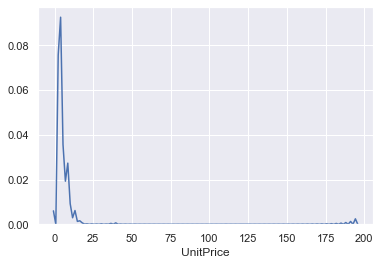

In [12]:
sns.set()
sns.distplot(file['UnitPrice'],hist=False)

In [13]:
pd.qcut(file['UnitPrice'],5)

0         (1.65, 2.55]
1         (2.55, 4.25]
2         (2.55, 4.25]
3         (2.55, 4.25]
4         (2.55, 4.25]
             ...      
19994    (4.25, 195.0]
19995     (1.65, 2.55]
19996     (1.65, 2.55]
19997     (0.85, 1.65]
19998    (4.25, 195.0]
Name: UnitPrice, Length: 19999, dtype: category
Categories (5, interval[float64]): [(0.099, 0.85] < (0.85, 1.65] < (1.65, 2.55] < (2.55, 4.25] < (4.25, 195.0]]

In [14]:
file['price_buckets']=pd.qcut(file['UnitPrice'],5,labels=['Critical','Low','Medium','High','Very High'])

In [15]:
file['price_buckets'].value_counts()

Low          5093
Critical     4047
High         3722
Very High    3650
Medium       3487
Name: price_buckets, dtype: int64

In [16]:
price_status=file[['CustomerID','price_buckets']].groupby(['CustomerID','price_buckets']).agg({'price_buckets':'count'})

In [17]:
price_status.rename({'price_buckets':'count'},axis='columns').reset_index()
price_status[(price_status != 0).all(1)]

price_buckets
CustomerID           price_buckets               
AV-pPOFauC1rwyj_ghHT Critical                   2
                     Low                        4
                     High                       4
AV0-JbjHvKc47QAVgW-C Critical                   8
                     Low                       14
...                                           ...
AWOpOCd2YSSHbkXw07ei High                       2
                     Very High                  5
AWOpWM18YSSHbkXw09Yj Critical                   3
                     Medium                     1
                     Very High                  1

[3517 rows x 1 columns]

In [18]:
file[['CustomerID','revenue_buckets','price_buckets']].groupby(['revenue_buckets','price_buckets']).agg({'CustomerID':'count'})

CustomerID
revenue_buckets price_buckets            
Very Low        Critical             1507
                Low                  1529
                Medium                964
                High                    0
                Very High               0
Low             Critical              701
                Low                   909
                Medium                585
                High                 1466
                Very High             460
Good            Critical             1096
                Low                   816
                Medium                630
                High                  541
                Very High             837
Very Good       Critical              293
                Low                  1279
                Medium                479
                High                 1051
                Very High            1166
Excellent       Critical              450
                Low                   560
                Medium                829
                High                  664
                Very High            1187

In [19]:
pd.crosstab(index=file['revenue_buckets'],columns=file['price_buckets']).apply(lambda x: x/x.sum(), axis=1)

price_buckets,Critical,Low,Medium,High,Very High
revenue_buckets,,,,,
Very Low,0.376750,0.382250,0.241000,0.000000,0.000000
Low,0.170104,0.220578,0.141956,0.355739,0.111623
Good,0.279592,0.208163,0.160714,0.138010,0.213520
Very Good,0.068650,0.299672,0.112231,0.246251,0.273196
Excellent,0.121951,0.151762,0.224661,0.179946,0.321680


In [20]:
file_rate=pd.crosstab(index=file['revenue_buckets'],columns=file['price_buckets'])

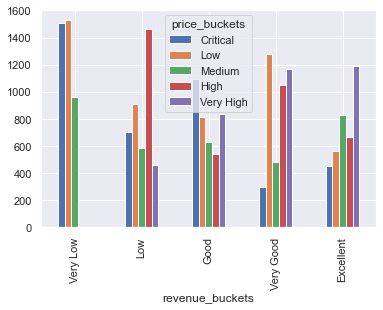

In [21]:
file_rate.plot.bar()

In [22]:
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([file_rate.iloc[0].values,file_rate.iloc[1].values, file_rate.iloc[2].values, file_rate.iloc[3].values, file_rate.iloc[4].values])

In [23]:
print ("chi2     : " ,chi2)
print ("p-value  : " ,p)
print ("Degree for Freedom : " ,dof)

chi2     :  4968.998230001493
p-value  :  0.0
Degree for Freedom :  16


In [24]:
import math
file['final_revenue']=file['Revenue'].apply(lambda x: int(math.ceil(x/10))*10)

In [25]:
file.head()

,InvoiceDate,Invoice Time,CustomerID,InvoiceNo,StockCode,Description,Country,Quantity,UnitPrice,Revenue,Items availability,revenue_buckets,price_buckets,final_revenue
0,14.12.2017,6:00,AVpgMuGwLJeJML43KY_c,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,6,2.55,15.30,In Stock,Very Good,Medium,20
1,08.09.2017,5:00,AVpgMuGwLJeJML43KY_c,536365,71053,WHITE METAL LANTERN,United Kingdom,6,3.39,20.34,In Stock,Excellent,High,30
2,10.10.2017,5:00,AVpgMuGwLJeJML43KY_c,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom,8,2.75,22.00,In Stock,Excellent,High,30
3,28.08.2017,7:00,AVpgMuGwLJeJML43KY_c,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,6,3.39,20.34,In Stock,Excellent,High,30
4,24.10.2017,4:00,AVpgMuGwLJeJML43KY_c,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,6,3.39,20.34,In Stock,Excellent,High,30


In [26]:
file.to_csv('Segmentdata.csv')